In [121]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Import gamma result and check it

In [122]:
ga = pd.read_csv('gamma_storage_config2.csv', sep = ',', header = None)

In [123]:
np.array(ga.tail(1))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

#### Import c result and allocate samples to clusters using objects pairwise co occurrence (co assoc. matrix)

In [124]:
c = np.array(pd.read_csv('c_storage_config2.csv', sep = ',', header = None))

In [125]:
def co_association_matrix(c):
    
    M = np.zeros([c.shape[1],c.shape[1]])
    for i in range(c.shape[1]):
        for j in range(c.shape[1]):
            for k in range(c.shape[0]):
                if c[k,i] == c[k,j]:
                    M[i,j] += 1
    
    return M/c.shape[0] 

In [126]:
M = co_association_matrix(c)
Mdf = pd.DataFrame(M)
Mdf
# two samples are in the same cluster if they happen to have the same labels x% of the time (usually x = 50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0000,0.4113,0.4257,0.3891,0.0522,0.0425,0.0587,0.2893,0.0788,0.0884,0.0845,0.1029,0.3194,0.0545,0.0428
1,0.4113,1.0000,0.4689,0.3864,0.0637,0.0504,0.0669,0.3380,0.1037,0.1016,0.1103,0.1332,0.3445,0.0632,0.0585
2,0.4257,0.4689,1.0000,0.4085,0.0679,0.0390,0.0601,0.3593,0.0935,0.1073,0.1130,0.1193,0.3591,0.0780,0.0536
3,0.3891,0.3864,0.4085,1.0000,0.0397,0.0458,0.0601,0.2431,0.0863,0.0794,0.0742,0.1020,0.3233,0.0631,0.0563
4,0.0522,0.0637,0.0679,0.0397,1.0000,0.4112,0.3811,0.1895,0.2658,0.3534,0.2938,0.1972,0.1338,0.3698,0.3380
5,0.0425,0.0504,0.0390,0.0458,0.4112,1.0000,0.3846,0.1527,0.3547,0.3714,0.2732,0.2319,0.1130,0.4146,0.4326
6,0.0587,0.0669,0.0601,0.0601,0.3811,0.3846,1.0000,0.1330,0.3807,0.3426,0.2163,0.1985,0.1163,0.3575,0.3774
7,0.2893,0.3380,0.3593,0.2431,0.1895,0.1527,0.1330,1.0000,0.2638,0.2720,0.2559,0.2527,0.3277,0.1770,0.1361
8,0.0788,0.1037,0.0935,0.0863,0.2658,0.3547,0.3807,0.2638,1.0000,0.3700,0.3332,0.3429,0.2109,0.4058,0.3804
9,0.0884,0.1016,0.1073,0.0794,0.3534,0.3714,0.3426,0.2720,0.3700,1.0000,0.3641,0.3476,0.2463,0.3774,0.3431


<AxesSubplot:>

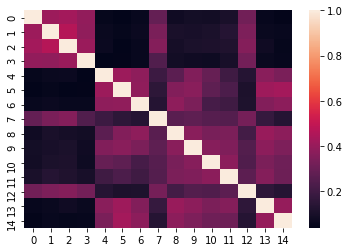

In [127]:
sns.heatmap(M)

In [128]:
assoc_threshold = 0.2

Mdf.iloc[np.array(Mdf >= assoc_threshold)] = 1
Mdf.iloc[np.array(Mdf < assoc_threshold)] = 0

In [129]:
Mdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
7,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [130]:
labels = np.arange(c.shape[1])

for sample_1 in range(c.shape[1]):
    for sample_2 in range(sample_1 +1, c.shape[1]):
        if Mdf.loc[sample_1, sample_2] == 1:
            labels[sample_2] = labels[sample_1]
            
def reindexing(c):
    reindexing = {}
    new_label = 1
    for label in np.unique(c):
        reindexing[label] = new_label
        new_label += 1
    for i in range(len(c)):
        c[i] = reindexing[c[i]]
    return c

clust_labels = list(reindexing(labels))
clust_labels

[1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]

#### Reminder : true clustering structure

In [131]:
true_labels = [1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]

In [132]:
separation_df = pd.DataFrame([clust_labels, true_labels])
separation_df.index = ['clust labels', 'true labels']
separation_df

# une séparation juste des données est obtenue par l'algo, bien qu'on ne retrouve pas le clustering exact

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
clust labels,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1
true labels,1,1,1,1,2,2,2,3,3,3,3,3,3,4,4
